In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp

In [101]:
def t_value(mean_1,mean_2,stddev_1,stddev_2,size_1,size_2):
    mean_difference = mean_1 - mean_2
#    stderr_1 = stddev_1 / (size_1 ** 0.5)
#    stderr_2 = stddev_2 / (size_2 ** 0.5)
#    denom_stderr = stderr_1 + stderr_2
    denom_sqrt = (((stddev_1 ** 2) / size_1) + ((stddev_2 ** 2) / size_2)) ** 0.5
#    print("Mean difference is {}\nstd. err 1 is {}; std. err 2 is {}".format(mean_difference,stderr_1,stderr_2))
#    print("Denominator using stderrs is {}\nDenominator of sqrt of variance/sample size is {}".format(denom_stderr,denom_sqrt))
#    sqrt_stderr_only = mean_difference / denom_stderr 
    sqrt_whole_denom = mean_difference / denom_sqrt
#    print("t-value using stderr is {}\nt-value using sqrt of whole denominator is {}".format(sqrt_stderr_only,sqrt_whole_denom))
    sample_1 = np.random.normal(mean_1,stddev_1,size_1)
    sample_2 = np.random.normal(mean_2,stddev_2,size_2)

    sns.distplot(sample_1)
    sns.distplot(sample_2)

# I was getting noticeably different t-values depending on how I tried 
#  to calculate the denominator in my function, so I thought I'd check
#  the t-value returned by this scipy function. 
    print(sp.stats.ttest_ind(sample_1, sample_2, equal_var=False))
    return sqrt_whole_denom #sqrt_stderr_only #

## Calculate the t-values for the following numbers:

### 𝑦1¯=5 , 𝑦2¯=8, 𝑠1=1, 𝑠2=3, 𝑁1=200, 𝑁2=500

Means are close, and standard deviations are small. Sample sizes are also relatively small; sample 2 has a larger sample size than sample 1.

Ttest_indResult(statistic=-19.04621434641362, pvalue=3.7369649792997823e-65)
The t-value is -19.78141420187361


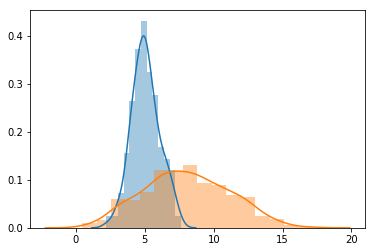

In [102]:
print("The t-value is {}".format(t_value(5,8,1,3,200,500)))

### 𝑦1¯=1090 , 𝑦2¯=999, 𝑠1=400, 𝑠2=30, 𝑁1=900, 𝑁2=100

Sample 1 has a large standard deviation, and a larger sample size relative to sample 2. Sample sizes are relatively small. I would expect the large variability for s1 and the small sample size for both groups will produce a smaller t-value.

Ttest_indResult(statistic=4.894626243721747, pvalue=1.1540577908934873e-06)
The t-value is 6.658536585365854


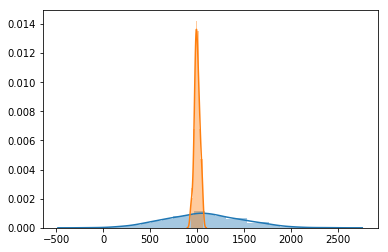

In [103]:
print("The t-value is {}".format(t_value(1090,999,400,30,900,100)))

### 𝑦1¯=45 , 𝑦2¯=40, 𝑠1=45, 𝑠2=40, 𝑁1=2000, 𝑁2=2000

Means are sort of close, standard deviations are larger but similar, sample sizes are large and equal.

Ttest_indResult(statistic=3.4120069266011432, pvalue=0.0006513162294913636)
The t-value is 3.7139067635410377


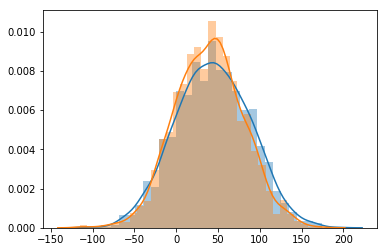

In [104]:
print("The t-value is {}".format(t_value(45,40,45,40,2000,2000)))